# Maximum Likelihood Estimation (MLE)


## Introduction

> The maximum likelihood estimation method is employed to estimate the values for the parameters of a model.

Consider the graphs in the image below:



<p align=center><img width=1200 src=images/mle_compare_dists.jpg></p>



## Data Generating and Empirical Distribution



Consider a dataset where every datapoint is the height of a person. 

Not all the values of height will appear in this dataset:
- It is very unlikely to include people with a height of 3 m. 
- It is also unlikely to include people with a height of 0.3 m.  
- Negative values will definitely be excluded.

### Basis

This occurs because not all heights are distributed among an equal number of people. Some heights are more likely to occur than others. We could describe this phenomenon using **data-generating distribution**, which, hereinafter, will be denoted by 
$$
p_{true}
$$

Our dataset is an **empirical distribution,** which is a real-life manifestation of a data-generating process. Consider a case where we have 100 people and their data. This is our **sample** on which we can calculate measures, such as the **mean**, **variance** and other properties of data-generating distributions. We will denote it by:

$$
p_{data}
$$

Notably, there are other distributions, which are visualised below.

<p align=center><img width=1200 src=images/dists.jpg></p>

Attempt to correlate the colors with the distributions in the image below.

<p align=center><img width=800 src=images/img-dists.jpg></p>



## Representativeness



We aim for our distribution to be **representative,** which implies that it should cover many possible states generated by the real distribution.



### Example



Let us assume that our **data-generating distribution** can take values from `1` to `5` inclusive (denoted as `v` for values) and that all the numbers have an equal probability of being generated (thus, `p=0.2` for each value).

Now, we calculate the mean of such a distribution:

$$
\mu = \sum_{i=1}^{5}v_ip_i = 3
$$

Next, let us assume that we have an **empirical distribution** and our only data are two numbers: `[4, 5]`. The calculated mean would be
$$
\mu = 4.5
$$ 

__This differs considerably from our true distribution,__ which we wish to approximate.

This is an example of a __non-representative__ distribution, which has the following properties:
- It __provides false information about an event__ (as a result, our predictions will deviate from those originally intended).
- It is __impossible to spot__ (we cannot know whether our empirical distribution is representative or not as __we have no access to the true data-generating distribution__).



### Ascertaining representativeness



One can never be certain if a distribution is representative. However, certain actions can be taken: 
- Obtain as many samples as possible to significantly improve the resemblance between the **empirical distribution** and the **true distribution**.
- Evaluate the variety of the data. For example, say our empirical distribution from the above example is `[1, 1, 1, 1, 1]`; it would be even worse than that originally intended. Conversely, some generating processes do not vary significantly; as such, __you should judge samples based on your domain knowledge.__



## Model-Distribution Relationship

Here, we provide answers to the question: 'How do models relate with distributions?'



### Classification



Classifiers predict the probabilities of an example, $x$, belonging to a particular class.
The outputs of the model create another distribution ($\hat{p}$), __which attempts to model the targets from the empirical distribution ($y$) given the data of the empirical distribution ($x$)__:

$$
    \hat{p}(y | x) \sim p(y)
$$

__Please note__ that $p(y)$ is equal to `1` for the correct class and `0` for all incorrect classes.

__Furthermore,__ there are cases where $p(y) \neg 1$ for the correct class in the classification (it can be `0.9` for example). This approach cautions the model against being overly confident in its predictions (see [label smoothing](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06)).



#### Example



Imagine a dataset of hand-written digits from `0` to `9` (a popular MNIST dataset).
The classifier should only return values from this range for each example. 

Instead of returning one value, our model outputs a __vector__ of size __10__, containing the probabilities of each belonging to each class; for example,

$$
    [0.1, 0.05, 0.05, 0.7, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05]
$$

In this case, our model predicts digit `3`, as indicated by the `0.7` probability. By applying this to all the samples in the dataset, we can obtain an empirical distribution of $p_{model}$. This leads to the conclusion that __all our models approximate a distribution.__



### Regression



Regression models predict continuous values from a supervised dataset (unlike classification, where the value is discrete). Otherwise, the idea remains similar.

Almost always, the distributions employed to model empirical data are Gaussian. This is because
- it fits many natural phenomena (dice throwing, human height, IQ tests).
- data with finite variance (almost always the case) becomes increasingly Gaussian when allowed to grow.

<p align=center><img width=800 src=images/regression.jpg></p>



## Entropy



> Entropy measures the level of uncertainty in a distribution.

It can also be regarded as the level of information contained in the source or 'surprise' during each trial.

Read up on entropy as a part of [Information Theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)).

> A distribution with the highest level of entropy is called a `uniform` distribution.



### Entropy formula



$$
H(X) = - \sum_{i=1}^n P(x_i)log(P(x_i))
$$



## Determining the Best Distribution for Describing Data



> The maximum likelihood parameters of a distribution are those that parameterise a given distribution such that the probability of sampling the observed data from it is maximised.

<p align=center><img width=1000 src=images/mle_deriv.jpg></p>

The result of this derivation gives a very important equation, which we have seen before: the __cross entropy loss__.



## Cross Entropy



We discussed cross-entropy previously during the multiclass logistic regression session. Here is the mathematical definition of the cross entropy between two distributions:

<p align=center><img width=1000 src=images/cross_entropy_definition.jpg></p>

Goodfellow et al. clarify further that 

>[...] any loss term that contains a negative log-likelihood is a cross entropy between the empirical distribution defined by the training set and the probability distribution defined by the model.

## The KL Divergence



ML aims to model things that we care about. We want to be able to know the distribution of the features (unsupervised problems) and labels (supervised problems) that appear in the data.

Ideally, knowledge of the __true data-generating distribution__ is also important. Therefore, it is imperative that we bridge the gap between the __empirical data distribution__ and the __model distribution__.

> Maximum likelihood **implicitly** minimises the difference between the empirical distribution $\hat{p}_{data}$ and the model distribution $p_{model}$.

This occurs because the term minimised in the cross entropy loss is identical to that which appears in the equation for the **KL-divergence**.

> KL Divergence is a measure of the difference between two distributions.

<p align=center><img width=1000 src=images/kl_definition.jpg></p>


> Minimising the cross entropy implicitly minimises the KL divergence.



<p align=center><img width=1000 src=images/kl_cross_entropy_argmin.jpg></p>

Throughout the rest of the course, we will attempt to minimise the expression produced from the above derivation of the MLE parameters, which is a __cross entropy between the empirical distribution and our model distribution__.

The dataset that we intend to model has an underlying distribution. To build a model of the same distribution, we need to minimise their difference.

We can do this by minimising the KL divergence, which quantifies their difference.
However, we do not actually have an expression for the empirical distribution which appears in the KL-divergence equation. Thus, instead of minimising the KL-divergence directly, we minimise the cross entropy, which has the same minimum point.

The KL-divergence and the cross entropy are related by the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)).

<p align=center><img width=1000 src=images/kl_cross_entropy_shannon_entropy_relationship.jpg></p>



## Visualising Unsupervised Data

Here, in an attempt to fit a distribution using maximum likelihood, we visualise some unsupervised data (no labels).

First, run the following cell to obtain some helper functions:

In [ ]:
!wget "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/get_colors.py" "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/utils.py"

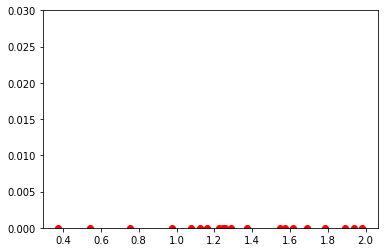

mean: 1.3208119017608309
standard deviation: 0.4351089077485842


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_regression_data, show_regression_data

X, Y = get_regression_data()

X = X[:, 0]
# Y = np.zeros_like(Y)

plt.scatter(X, np.zeros(X.shape[0]), c='r')
plt.ylim(0, 0.03)
plt.show()

mu = np.mean(X)
sigma = np.std(X)
print('mean:', mu)
print('standard deviation:', sigma)


We will model the data with a Gaussian (normal distribution).

<p align=center><img src=images/gaussian.jpg width=800></p>

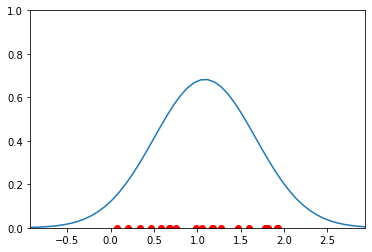

In [3]:
import numpy as np

class GaussianPDF:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        p_x = np.exp(-(x - self.mu)**2 / (2*self.sigma**2)) / ( np.sqrt(2*np.pi) * self.sigma) ## pdf equation for gaussian
        return p_x

p = GaussianPDF(mu, sigma)

p(0)
domain = np.linspace(min(X)-1, max(X)+1)
plt.plot(domain, p(domain))
plt.scatter(X, np.zeros(X.shape[0]), c='r')
plt.ylim(0, 1)
plt.xlim(min(domain), max(domain))
plt.show()

Now, the question of interest is as follows: 'What is the central position (mean) of the Gaussian distribution that best describes the feature values of the data, assuming that they are normally distributed?'

As the first step to the solution, we test out different Gaussian distributions by evaluating the likelihood of the dataset being sampled from each of them, using the formula we derived above.

BEST VAL: -17.637918130177415
BEST MU: 1.096423061806837


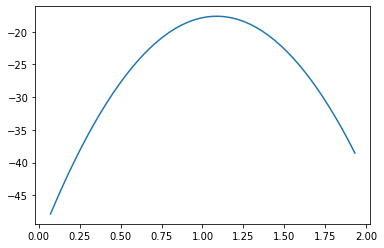

In [4]:
mus = np.linspace(min(X), max(X), 50)
objectives = np.zeros_like(mus)
best_mu = 0
best_val = -float('inf') # initialise the best value as infinitely bad
for idx, m in enumerate(mus): # enumerate over all the mus
    p = GaussianPDF(m, sigma) # initialise a Gaussian
    obj = 0 ## initialise the objective as zero
    for x in X:
        obj += np.log(p(x)) # compute the log-likelihood for this example, and add it to the objective that we wish to maximise
    objectives[idx] = obj
    if obj > best_val:
        best_val = obj
        best_mu = m
    # print(obj)

print('BEST VAL:', best_val)
print('BEST MU:', best_mu)

plt.plot(mus, objectives)


## Visualising Supervised Data



Next, we consider the case where our dataset contains labels as well as example features.

We can follow the same steps to find an objective function for solving supervised regression problems. We simply model the conditional distribution over the labels (given the features), rather than modelling the distribution of features.

<p align=center><img src=images/supervised_mle.jpg width=800></p>

Thus, for every input, our model will output a distribution, rather than a point estimate. 

We can do this by simply having our model output the parameters for a particular distribution over labels, such as the mean and variance of a Gaussian.

In this case, we will assume that the variance of these distributions is fixed. Note that this will not affect the argmax of the distribution.



## The Central Limit Theorem



Here, we assume that the distribution over labels **for a particular example** is Gaussian because of the [central limit theorem](https://www.youtube.com/watch?v=YAlJCEDH2uY).

> The central limit theorem states that the mean of a sample of the same measurement will be normally distributed, even if the individual measurements are not normally distributed.

Therefore, even if an example's observed label is noisy and affected by a random error, the distribution of the mean of labels assigned to it over many attempts will still be normally distributed.

__For example__, if a human labelling hand-written digits clicks an incorrect label with a uniformly random probability, the mean of the labels assigned to this example will be normally distributed about the true mean.



## Visualising Labels as Distributions



Consider a case where we are modelling the labels of a particular example with a normal distribution.

Below, we will take Gaussians of a fixed size and plot them over the y-axis, centred with their mean at the position of the true label. 
These Gaussians will vary in the positive x direction from the feature value, based on the probability that this distribution is assigned to any given label value.

As mentioned, the Gaussians are fixed in size by having a constant standard deviation and are scaled down in size so that they can be easily visualised.

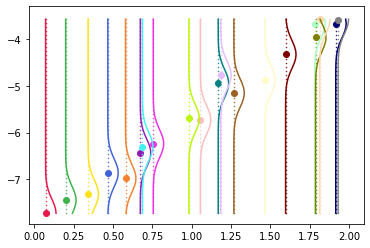

In [5]:
from get_colors import colors

def plot_dist(x, y, color='blue'):
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 0.3)
    distributions = 0.05*p(domain) # scale down the size of the distributions for visualisation
    p_plot = distributions + x # place the distribution extending from the x position of the example to which it corresponds
    plt.plot(p_plot, domain, c=colors[i%len(colors)]) # plot each distribution of the predicted labels against
    plt.scatter(np.ones_like(domain)*x, domain, c=colors[i%len(colors)], marker='.', s=1)

for i in range(len(X)):
    x = X[i]
    y = Y[i]
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 1)
    plt.scatter(x, y, c=colors[i%len(colors)])
    plot_dist(x, y)
plt.show()


## Producing Distributions over Labels

Here, we employ the model to produce the distributions over labels for each input example.

The model will probably not produce the same Gaussians because it will likely encounter an error in predicting the label (mean of the Gaussian) for each example.


[2.22322023]


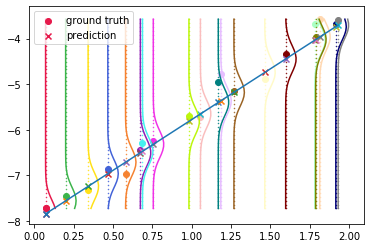

In [6]:
grad = (Y[-1] - Y[0]) / (X[-1] - X[0])
print(grad)

class LinearModel:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, x):
        return self.b + self.w * x

model = LinearModel(grad, -8)

for i in range(len(X)):
    color = colors[i%len(colors)]
    if i == 0:
        plt.scatter(X[i], Y[i], c=color, label='ground truth')
        plt.scatter(X[i], model(X[i]), marker='x', c=color, label='prediction')
    plt.scatter(X[i], Y[i], c=color)
    plt.scatter(X[i], model(X[i]), marker='x')
    plot_dist(X[i], model(X[i]))
    plt.legend()
plt.plot(X, model(X))
plt.show()

## Linear Regression as the Maximum Likelihood



Previously, we implemented a linear-regression algorithm that made a point estimate of label $y$ given input $x$.
We chose to minimise the MSE somewhat arbitrarily. We decided on this as the criterion, instead of minimising the absolute error or the mean quadratic error, because we intend to find the parameters of the defined model that best describe the data, i.e. the maximum likelihood parameters $\theta_{ML}$.
We need to link the probability distributions produced by our model's parameterisation.

Let us revisit the linear-regression algorithm from the perspective of maximum likelihood.

> Rather than predict a point estimate, the model will predict a conditional probability distribution, $p(y|x;\theta)$, over label $y$, given $x$.

That means that rather than predict the exact value, the model will predict the confidence of the label, taking one in a range of possible values for each example input.

To yield the same linear-regression learning algorithm, we assume that the distribution over labels for a given example is Gaussian. Once more, this is warranted by the central limit theorem.



## Deriving the MSE Loss Function from the Maximum Likelihood



We know that maximum likelihood maximises the probability of observing empirical data and that __our model is a distribution__. By putting the equation for our assumed Gaussian probability distribution into the objective that we defined earlier, we transform it into the same objective that we minimised previously, i.e. the mean squared error.

<p align=center><img src=images/linear_reg_as_mle.jpg width=1200></p>

This should explain our reason for optimising for the MSE loss rather than any other arbitrary loss function, such as the absolute error (although there are cases where this approach would be more suitable).


## Conclusion
At this point, you should have a good understanding of

- what it means to find the 'optimal' parameters mathematically.
- how to derive the MLE from scratch.
- how to quantify the confidence in a particular parameterisation.
- why the MSE loss function is employed for regression tasks rather than, for example, the absolute or quartic squared error.